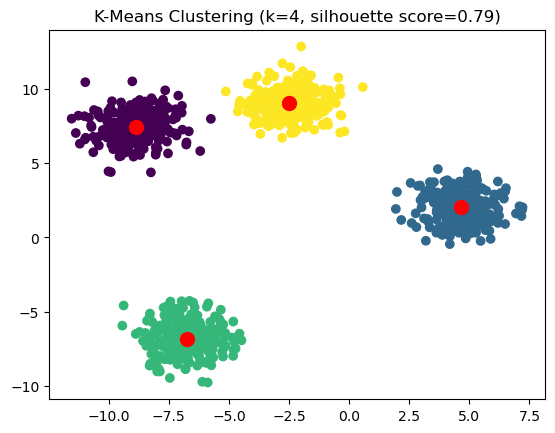

In [1]:
try:
    import warnings
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    from sklearn.datasets import load_wine
    # link to the dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
    
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    warnings.filterwarnings("ignore")
except Exception as e:
    print('Import error: ', e)


X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)


scores, models, k_values = [], [], range(2, 10)

# build model for each number of clusters and calculate its score
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    models.append(model)
    score = silhouette_score(X, model.labels_)
    scores.append(score)

# find best score
best_k = k_values[np.argmax(scores)]

# find best model
best_model = models[np.argmax(scores)]

plt.scatter(X[:, 0], X[:, 1], c=best_model.labels_)
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], s=100, c='red')
plt.title(f'K-Means Clustering (k={best_k}, silhouette score={np.max(scores):.2f})')
plt.show()